# In-Class 1: Springs and Pendula

In last week's lab, you generated datasets from damped and un-damped springs, as well as a pendulum. You were able to use this data to measure periods of oscillation and estimate spring constants and the gravitational acceleration constant.

Today, we'll look more closely at this data's full functional form, and see how much more precisely we can extract those values.

## Getting started with springs

We're going to use some Python to make these plots, but I don't expect you to understand every element. We'll build some basic Python skills over the semester.

First, we're going to load in the data you saved from your undamped spring, and plot the data. To put your data onto ISAAC, use the `Upload` button on your Jupyter notebook main page, and make a note of the filename. In the next codeblock, edit the filename so it points to your data.

In [1]:
# TODO: Add your file name here and execute the cell
myFile = 'Spring (Undamped) Raw Data.csv'

Now you've stored that filename in a variable called `myFile`. So long as you've executed that cell (selected it, then click the `Run` button or hit `Shift+Enter`) you'll be able to use that variable in any other cells you execute.

Let's see if it worked.

In [2]:
# This is a python module: it's not part of the default environment, but we can import it and use its functions
# Pandas is a module that helps us manipulate data, and it can read in csv files
import pandas as pd

myData = pd.read_csv(myFile)

# We can print its contents to see if it worked
# This should show us a summary of what the data looks like
print(myData)

       Time (s)  Acceleration x (m/s^2)  Acceleration y (m/s^2)  \
0    152.567813               -2.312015                0.148258   
1    152.587801               -1.611081               -0.424556   
2    152.607790               -1.604579               -0.825548   
3    152.627778               -0.913197               -1.001556   
4    152.647766               -0.545275               -0.942299   
..          ...                     ...                     ...   
495  162.461900               -0.043274               -0.009547   
496  162.481888                0.269339                0.431064   
497  162.501876               -0.343053                0.220872   
498  162.521864                0.060077               -0.295969   
499  162.541852               -0.286364                0.293777   

     Acceleration z (m/s^2)  
0                  2.378309  
1                  2.400924  
2                  0.960837  
3                  0.366066  
4                  0.031210  
..             

Our dataset has four columns: time, and the measured acceleration in x, y, and z. This should look a lot like the data you put in your spreadsheet during the lab.

We've read this data into an object called a dataframe, which is defined in a module called Pandas. The dataframe is a way of storing spreadsheet-like data, and it lets us quickly make operations on full columns to get results. We'll see some examples of that later.

We can access each of these columns by using the column headers. To access a list of all the time values, for example, we can use this syntax: `myData['Time (s)']`. 

In [3]:
# As we saw last week, we can access individual columns of this data with this syntax
print(myData['Time (s)'])

# We can access individual elements of this column by adding another index, this one numeric
print() # Just adding an empty line
print("Element 3 of the time column:", myData['Time (s)'][3])

0      152.567813
1      152.587801
2      152.607790
3      152.627778
4      152.647766
          ...    
495    162.461900
496    162.481888
497    162.501876
498    162.521864
499    162.541852
Name: Time (s), Length: 500, dtype: float64

Element 3 of the time column: 152.6277778


In this dataset, time is the independent variable, and the other three columns are measurements as a function of time. We can make a simple plot of from this that shows how the three dependent variables change with time. This should look a lot like the plot you made during the lab.

If your dataset has a lot of junky areas, you can uncomment the code block below and put in the values you want to isolate just the good parts.

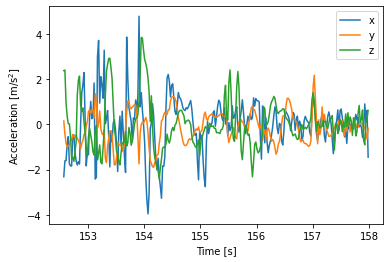

In [4]:
# Another module we'll use a lot is matplotlib, and in particular its submodule, pyplot. 
from matplotlib import pyplot as plt

# TODO: Modify and uncomment this to cut out any messy parts of data 
t0 = 152.5     # This is where you want your plot to begin
tf = 158   # This is where you want your plot to end
myData = myData[myData['Time (s)'].between(t0, tf)]   # This is selecting data for all columns between those time points

# Plot the basic raw data from the spring
plt.plot(myData['Time (s)'],myData['Acceleration x (m/s^2)'], label='x')
plt.plot(myData['Time (s)'],myData['Acceleration y (m/s^2)'], label='y')
plt.plot(myData['Time (s)'],myData['Acceleration z (m/s^2)'], label='z')
plt.xlabel('Time [s]')
plt.ylabel(r'Acceleration [m/s$^2$]')
plt.legend()
plt.show()

Let's focus on motion in one direction. In your data, the choice of direction might be different, depending on the setup you used, but hopefully you have most of your motion aligned with one of our axes. If we think this is an un-damped spring, we know that the motion should follow a cosine wave. Its generic form looks like this:

$$ x(t) = A\cos(kx-\omega t) $$

Let's test this out -- how well does a cosine wave approximate our data? The code below will overlay a cosine wave with adjustable parameters on the motion in the x direction. Can you adjust them to find a cosine wave that fits?

Warning: this code will get a bit more complex, don't worry -- you don't need to know how to make sliders! But basically we're just putting all the old code into a function, which means we can call it over and over again with different parameters. Every time the sliders change, the function gets called again and we get a new plot.

In [5]:
# Create a model for the data with adjustable parameters
import numpy as np
from ipywidgets import interact, FloatSlider

def interact_cosine(A, w, phi):
 
    # Create a set of t points in a range that matches the data
    t0 = myData['Time (s)'].iloc[0]    # Get the value of the first time point
    tf = myData['Time (s)'].iloc[-1]   # Get the value of the last time point
    t = np.linspace(t0, tf, 200)
    
    # Generate our y values for every t point according to our function
    # We're offsetting our t here to make our lives easier, try removing the offset
    # if you're curious why
    y = A*np.cos(w*(t-t0) - phi)

    # Plot y as a function of t and overlay the datapoints
    plt.plot(t, y, label="Model", color='orange')
    # The scatter function works just like plot, but it draws unconnected dots instead of lines
    plt.scatter(myData['Time (s)'],myData['Acceleration y (m/s^2)'], label="Data")
    plt.legend()
    plt.xlabel('Time [s]')
    plt.ylabel(r'Acceleration [m/s$^2$]')
    # Matplotlib uses something called Mathtext to render greek letters and equations
    # It uses syntax similar to LaTeX, where special symbols are indicated with a \, and are surrounded by $
    # The r before the string tells python not to use the raw value, and not the other special meanings for \ (escape)
    # You can try printing out simple strings like r'\'' and '\'' to explore the difference
    plt.title(r'Testing function: f(t) = A cos($\omega$t-$\phi$)')

# Draw the whole thing with sliders for input
a = interact(interact_cosine, 
            A = FloatSlider(min=0, max=2, step=0.01, value=0.5),
            w = FloatSlider(min=0, max=10, step=0.01, value=2),
            phi = FloatSlider(min=0, max=2*np.pi, step=0.1, value=2))

interactive(children=(FloatSlider(value=0.5, description='A', max=2.0, step=0.01), FloatSlider(value=2.0, desc…

### Add your conclusions here:

#### What are the best fit values for your parameters?

A = 0.78 meters

$\omega$ = 8.05 $rad/s$

$\phi$ = 1.60 rad

#### Does your frequency match the one you measured in your lab within error?
Almost. The measured frequency was 2 oscillations $\pm$ 0.5 per second. The calculated frequency from $\omega$ above comes out to 1.3 oscillations per second.

#### Does this model fit the data well? Are there any signs that the model isn't perfect? What could explain this?
Ish. The oscillations are not as evenly spaced as those of the cosine model. Small disturbances that occured in the physical experiement that caused movement to be split between axes may explain part of the difference. Also, our data was bad and should feel bad, so I'm surprised the model fits as well as it does.

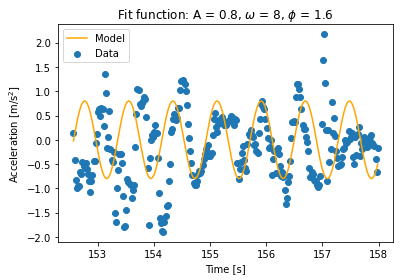

In [6]:
# Make your final plot
# TODO: Modify your parameters here:
A = 0.8
w = 8
phi = 1.6

# Create a set of t and y points using your fit paramters
t0 = myData['Time (s)'].iloc[0]    # Get the value of the first time point
tf = myData['Time (s)'].iloc[-1]   # Get the value of the last time point
t = np.linspace(t0, tf, 200)
y = A*np.cos(w*(t-t0) - phi)

# Plot your modeled wave and your data
plt.plot(t, y, label="Model", color='orange')
plt.scatter(myData['Time (s)'],myData['Acceleration y (m/s^2)'], label="Data")
plt.xlabel('Time [s]')
plt.ylabel(r'Acceleration [m/s$^2$]')
plt.legend()
# This is special syntax for string formatting -- each set of curly brackets gets replaced with 
# the value of the variables that are passed to the format function
plt.title(r'Fit function: A = {}, $\omega$ = {}, $\phi$ = {}'.format(A,w,phi))  
plt.show()

### Adding in damping:

Once we explicitly damp our spring, we should see that a cosine wave is now a very bad approximation. A damped oscillator continues to oscillate, but the amplitude shrinks with time according to an exponential. For motion in one direction, the equation for a damped oscillator looks like this:

$$ x(t) = e^{-\gamma t}A\cos(\omega t) $$

where 

$$ \gamma = \frac{b}{2m} $$

Let's try fitting our damped oscillator with this function. First, upload your damped oscillator data and point this variable to it, then select the time period you want. 

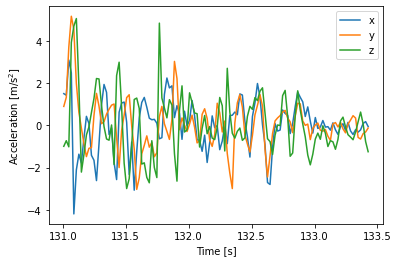

In [7]:
# TODO: Add in your filename for the damped oscillator
myFile2 = 'Spring (Damped) Raw Data.csv'
myData2 = pd.read_csv(myFile2)

# TODO: Modify and uncomment this to cut messy parts of data if you need to
t0 = 131
tf = 137
myData2 = myData2[myData2['Time (s)'].between(t0, tf)]

# Plot the basic raw data from the spring
plt.plot(myData2['Time (s)'],myData2['Acceleration x (m/s^2)'], label='x')
plt.plot(myData2['Time (s)'],myData2['Acceleration y (m/s^2)'], label='y')
plt.plot(myData2['Time (s)'],myData2['Acceleration z (m/s^2)'], label='z')
plt.xlabel('Time [s]')
plt.ylabel(r'Acceleration [m/s$^2$]')
plt.legend()
plt.show()

Just as before, we'll now try to fit our function to our data and extract the parameters. 

In [8]:
def interact_damped_cosine(A, w, phi, gamma):
 
    # Create a set of time points in a range that matches the data
    t0 = myData2['Time (s)'].iloc[0]    # Get the value of the first time point
    tf = myData2['Time (s)'].iloc[-1]   # Get the value of the last time point
    t = np.linspace(t0, tf, 200)
    
    # Generate a set of y points with the function we're testing
    y = A*np.exp(-gamma*(t-t0))*np.cos(w*(t-t0) - phi)

    # Plot y as a function of t and overlay the datapoints
    plt.plot(t, y, label="Model", color='orange')
    plt.scatter(myData2['Time (s)'], myData2['Acceleration y (m/s^2)'], label="Data")
    plt.xlabel('Time [s]')
    plt.ylabel(r'Acceleration [m/s$^2$]')
    plt.legend()
    plt.title(r'Testing function: f(t) = A $e^{-\gamma t}$ cos($\omega$t-$\phi$)')

# Draw the whole thing with sliders for input
a = interact(interact_damped_cosine, 
            A = FloatSlider(min=0, max=2, step=0.01, value=0.5),
            w = FloatSlider(min=0, max=10, step=0.01, value=2),
            phi = FloatSlider(min=0, max=2*np.pi, step=0.1, value=2),
            gamma = FloatSlider(min=0, max=1, step=0.01, value=0.01))

interactive(children=(FloatSlider(value=0.5, description='A', max=2.0, step=0.01), FloatSlider(value=2.0, desc…

### Add your conclusions here:

#### What are the best fit values for your parameters?

A = 1.55 meters

$\omega$ = 8.48 $rad/s$

$\phi$ = 2.20

$\gamma$ = 0.62

#### Is your frequency the same as for the undamped oscillator? Is this expected?

Nope. It's about half of the undamped frequency. This is expected, as the angular frequency (upon which frequency is dependent) is reduced as damping force is increased. 

#### Does this model fit the data well? Are there any signs that the model isn't perfect? What could explain this?

"Well" may be a strong word. The model doesn't deviate strongly from the localized averages of individual sections of data points, but doesn't actually intersect with a high percentage of the data points themselves. As with the undamped spring, environmental interference made the motion stray from perfectly smooth oscillations. Also, as with the undamped spring data, our data is still very bad.

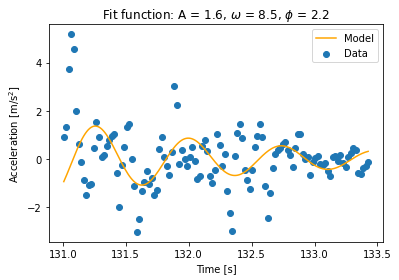

In [9]:
# TODO: Your turn: use code snippets from above to make a simple plot of your data and your model function
# You can look to the last time we did this for an example -- it only needs a small modification

# TODO: Add your parameters here
A = 1.6
w = 8.5
phi = 2.2
gamma = 0.62

# TODO: Create a set of t and y points using your fit paramters
t0 = myData2['Time (s)'].iloc[0]    # Get the value of the first time point
tf = myData2['Time (s)'].iloc[-1]   # Get the value of the last time point
t = np.linspace(t0, tf, 200)
y =  A*np.exp(-gamma*(t-t0))*np.cos(w*(t-t0) - phi)


# TODO: Plot your modeled wave and your data
plt.plot(t, y, label="Model", color='orange')
plt.scatter(myData2['Time (s)'],myData2['Acceleration y (m/s^2)'], label="Data")
plt.xlabel('Time [s]')
plt.ylabel(r'Acceleration [m/s$^2$]')
plt.legend()
# This is special syntax for string formatting -- each set of curly brackets gets replaced with 
# the value of the variables that are passed to the format function
plt.title(r'Fit function: A = {}, $\omega$ = {}, $\phi$ = {}'.format(A,w,phi))  
plt.show()

## Moving on to pendula

Export the data from our [google sheet](https://docs.google.com/spreadsheets/d/1ZLB8UqgZRvmt0eFRAki0OqCrYxZ4H1imjLnizxLGsyA/edit#gid=0) as a CSV, and upload it here.

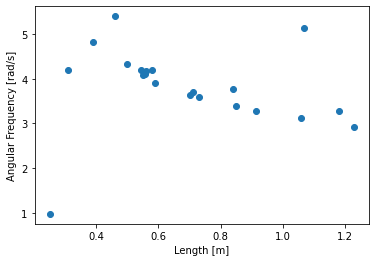

In [10]:
# TODO: Add the file name here
classFile = 'Pendulum Class Measurements_try.csv'
classData = pd.read_csv(classFile)

# Plot the basic raw data from the spring
# TODO: improve the style (see instructions below)
#plt.plot(classData['Length [m]'], classData['Angular Frequency [rad/s]'])
#plt.plot(classData['Length [m]'], classData['Angular Frequency [rad/s]'], marker='o', linestyle='none')
plt.scatter(classData['Length [m]'], classData['Angular Frequency [rad/s]'])
plt.xlabel('Length [m]')
plt.ylabel('Angular Frequency [rad/s]')
plt.show()

**This is not a great way to plot this data!** It doesn't make much sense to connect these lines, since they're not in order, and we have no way of visualizing the errors on each. Let's try something better suited.

First, look at the code above and try commenting out the line that plots the data currently, and uncommenting the line below it or the one after that. Each of them should do the same thing -- we can use special functions like scatter to plot data like this, or we can manipulate the plot aesthetics by modifying plotting options. 

But we're still missing any information about error bars. To show those, we'll have to pull in that data from the spreadsheet, manipulate it a bit, and use a new plotting function.

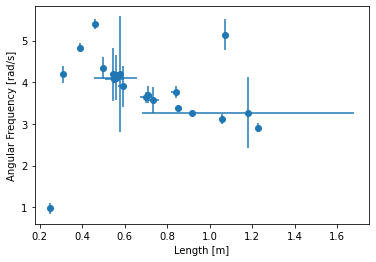

In [11]:
# First calculate the size of the errors we want on each datapoint -- we need these to be on the same 
# scale as our datapoints, so they have to have the same units.

# Pandas dataframes let us perform operations on whole columns of data as if we were doing it on one element
# (error in meters) = (length in meters)(percent error)/100
classData['Length Uncertainty [m]'] = classData['Length Uncertainty [%]']*classData['Length [m]']/100
classData['Angular Frequency Uncertainty [rad/s]'] = classData['Angular Frequency Uncertainty [%]']*classData['Angular Frequency [rad/s]']/100

# TODO: Try printing out your dataframe now -- you should see that you've successfully added new columns

plt.errorbar(classData['Length [m]'],classData['Angular Frequency [rad/s]'], 
             yerr=classData['Angular Frequency Uncertainty [rad/s]'], xerr=classData['Length Uncertainty [m]'],
             marker='o', linestyle='none')

plt.xlabel('Length [m]')
plt.ylabel('Angular Frequency [rad/s]')
plt.show()

Hopefully now you can see the x and y errors on each point. This will help guide our eye when we try to fit the function. 

In [12]:
def interact_sqrt(A):
 
    # Create a set of x points in a range that matches the data
    x0 = 0.3
    xf = 2
    x = np.linspace(x0, xf, 200)
    
    # Generate a set of y points with the function we're testing
    y = A*np.sqrt(1/x)

    # Plot y as a function of x and overlay the datapoints
    plt.plot(x, y, label="Model", color='orange')
    plt.errorbar(classData['Length [m]'],classData['Angular Frequency [rad/s]'], 
             yerr=classData['Angular Frequency Uncertainty [rad/s]'], xerr=classData['Length Uncertainty [m]'],
             marker='o', linestyle='none', label='Data')
    plt.legend()
    plt.grid()
    plt.xlabel('Length [m]')
    plt.ylabel('Angular Frequency [rad/s]')
    plt.title(r'Testing function: f(t) = A $\sqrt{1/x}$')

# Draw the whole thing with sliders for input
a = interact(interact_sqrt, 
            A = FloatSlider(min=0, max=10, step=0.1, value=5))

interactive(children=(FloatSlider(value=5.0, description='A', max=10.0), Output()), _dom_classes=('widget-inte…

### Add your conclusions here:

#### Take your fit value of A, and calculate g.

$\omega = A\sqrt{\frac{1}{L}}$

&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; $=\frac{2\pi}{T}=\frac{1}{\sqrt{\frac{L}{g}}}=\sqrt{\frac{g}{L}}$

$\frac{g}{L}=\omega^2$

$g=\omega^2 L=(A\sqrt{\frac{1}{L}})^2 L=A^2$

In [13]:
A = 3.1

def gravCalc (x):
    return x*x

print('A =', A)
print('g =', gravCalc(A))

A = 3.1
g = 9.610000000000001


#### Are there any outlier points? What might have caused this?


There are a few significant outliers, three of which indicate use of a pendulum length less than 0.5 meters. For these three, it is likely that the shorter length contributed to larger amplitudes, decreasing the accuracy of the small angle approximation needed to model pendular motion as simple harmonic oscillations. 

### _For a challenge..._

Here are three increasingly hard extensions to today's exercises that are beyond the scope of what's expected of you in this class. Give them a try if you'd like, or ignore this completely! 

1. Fitting a square root is a lot harder to do by eye than fitting a line. Can you turn this problem into one that just requires you to fit a line? 
2. Try writing an automatic fitter for this dataset (for example using the curve_fit function from scipy).
3. Try writing an automatic fitter for our undamped spring. Can you get this to work as well as the manual version? What makes fitting a cosine wave challenging?

#### 1. Somewhere along the line...

In [100]:
# Defining 'g' and compiling the class's calculations for g.
g = 9.81
classG = (classData['Angular Frequency [rad/s]']*classData['Angular Frequency [rad/s]']*classData['Length [m]'])

# Arrays to be filled with the non-error values of g and a separate index for later reference.
culledG = []
culledGID = []

# Initializing at zero like a good boyscout. 
i = 0

for n in classG:
    if n > 3: # Getting rid of NaN values. 3 arbitrarily selected.
        culledG.append(n)
        culledGID.append(i)
    i = i+1

# Getting the mean value of g.
meanG = np.mean(culledG)

# Handy-dandy percent error calculator! (t = "true" value)
def percEr(t, u):
    return(np.absolute((u-t)/t))

# Arrays to be filled with the percent error from g and a separate index for later reference.
percError = []
percErrorID = []

j = 0

for n in culledG:
    percError.append(percEr(meanG, n))
    percErrorID.append(j)
    j = j+1

# Pulling out index and value of the approximation of g closest to the average.
goodID = percErrorID[np.where(percError==np.min(percError))[0][0]]
goodG = classG[goodID]

print(goodG, 'is the closest to average approximation of g.')

# Noting its corresponding omega and L values.
goodW = classData['Angular Frequency [rad/s]'][goodID]
goodL = classData['Length [m]'][goodID]

print('It results from an angular frequency of', goodW, 'rad/s, and a pendulum length of', goodL, 'm.')

print('The average approximation of g is:', meanG)

10.415763000000002 is the closest to average approximation of g.
It results from an angular frequency of 2.91 rad/s, and a pendulum length of 1.23 m.
The average approximation of g is: 10.800421201910002


The point-slope equation of a line = $y_2 - y_1 = m(x_2 - x_1)$.

In [101]:
# Calculating the y-intercept (y_2) of a linear function following this approximation with a slope of g.
b = (goodW*goodW)-g*(-goodL)
print(b)

20.5344


In [103]:
def interact_line(A):
 
    # Create a set of x points in a range that matches the data
    x0 = 0
    xf = 2
    x = np.linspace(x0, xf, 200)
    
    # Generate a set of y points with the function we're testing, using our hard-won y-intercept.
    y = A*(x)+b
    
    # Plot y as a function of x and overlay the datapoints
    plt.plot(x, y, label="Model", color='orange')
    plt.plot(classData['Length [m]'],(classData['Angular Frequency [rad/s]']*classData['Angular Frequency [rad/s]']), 
             marker='o', linestyle='none', label='Data')
    plt.legend()
    plt.grid()
    plt.xlabel('Length [m]')
    plt.ylabel('Squared Angular Frequency [$rad^2/s^2$]')
    plt.title(r'Testing function: f(t) = Ax+b')

# Draw the whole thing with sliders for input
a = interact(interact_line, 
            A = FloatSlider(min=-12, max=-4, step=0.1, value=5))

interactive(children=(FloatSlider(value=-4.0, description='A', max=-4.0, min=-12.0), Output()), _dom_classes=(…